In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
paths= []
labels= []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        print('Dataset is Loaded')
        break

Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded
Dataset is Loaded


In [4]:
##Load the Dataset

In [5]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_raid_angry.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear/OAF_gap_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust/OAF_good_disgust.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_soup_neutral.wav']

##Import Modules

In [6]:
labels[:5]

['fear', 'angry', 'fear', 'disgust', 'neutral']

In [7]:
##Create a dataframe
df = pd.DataFrame()
df['speech']= paths
df['label']= labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,angry
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,disgust
4,/kaggle/input/toronto-emotional-speech-set-tes...,neutral


In [8]:
df['label'].value_counts()

fear       4
angry      4
disgust    4
neutral    4
sad        4
ps         4
happy      4
Name: label, dtype: int64

##Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

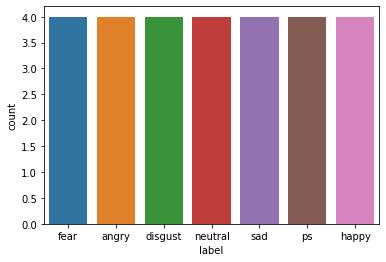

In [9]:
sns.countplot(df['label'])

In [10]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sampling_rate, x_axis='time',y_axis='hz')
    plt.colorbar()
    

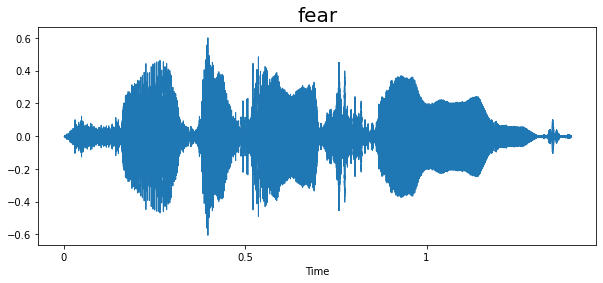

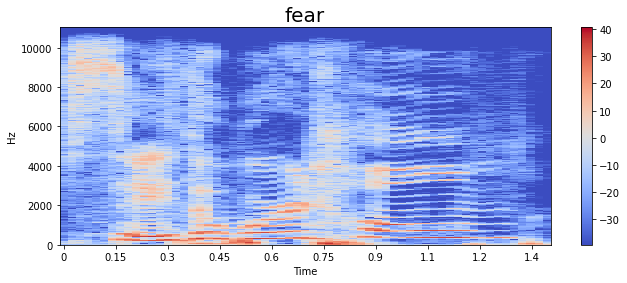

In [11]:
emotion = 'fear'
path = df['speech'][df['label']==emotion][0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

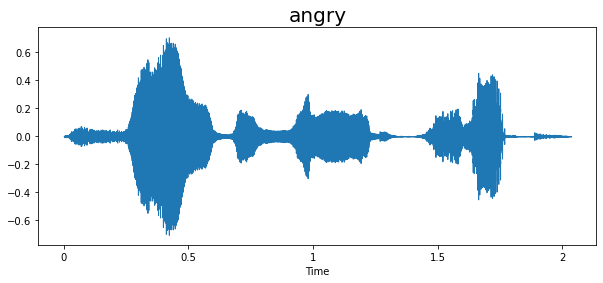

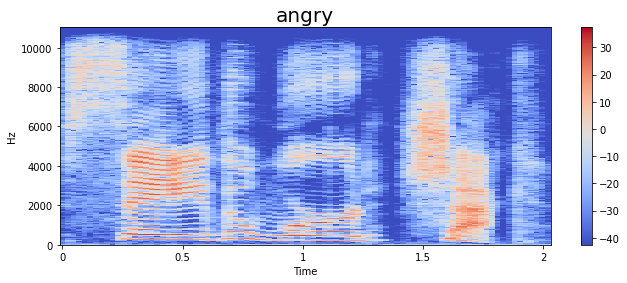

In [12]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

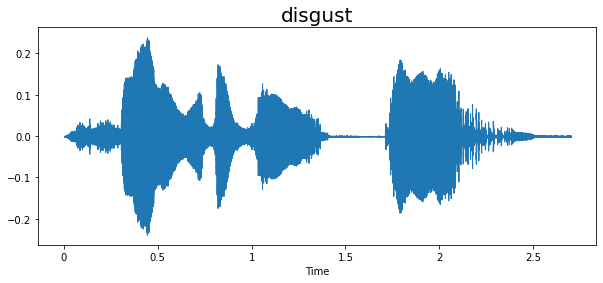

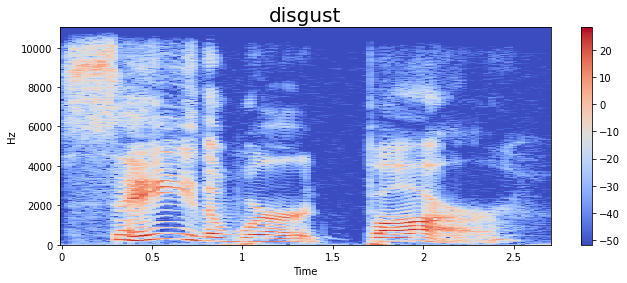

In [13]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

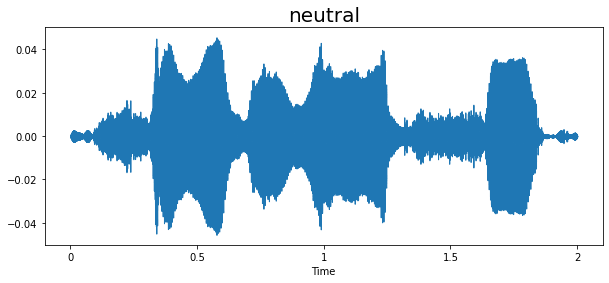

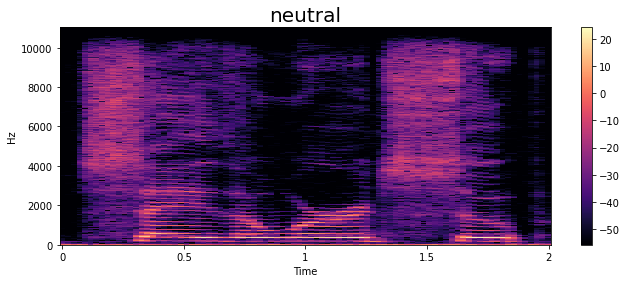

In [14]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

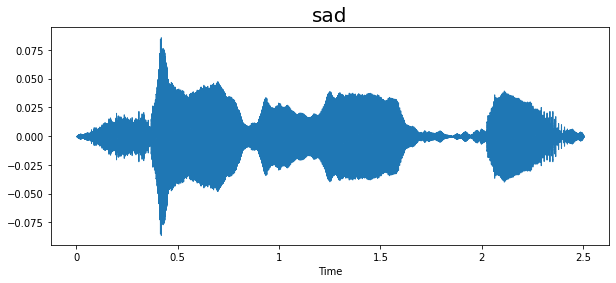

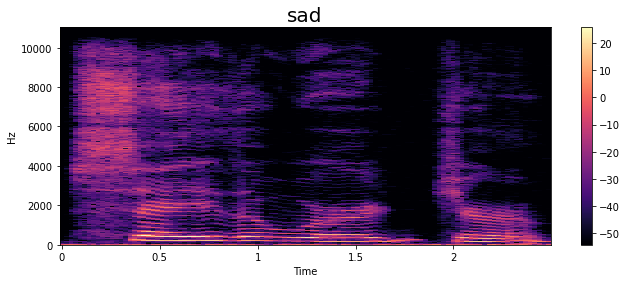

In [15]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

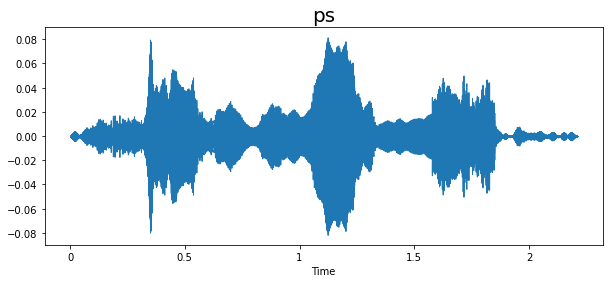

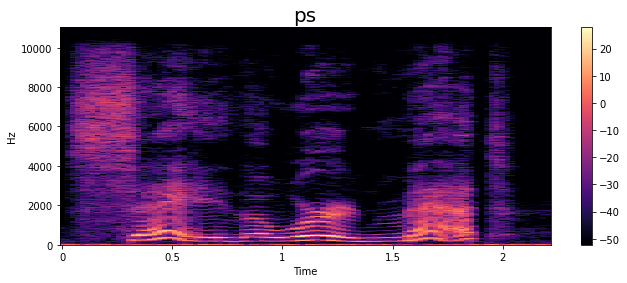

In [16]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

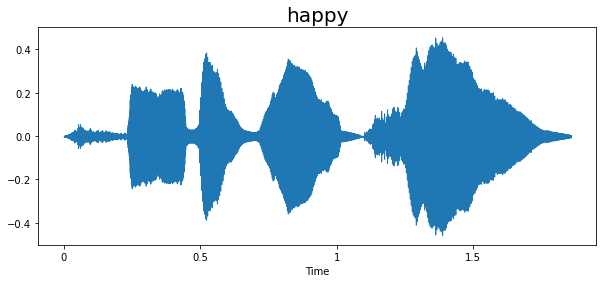

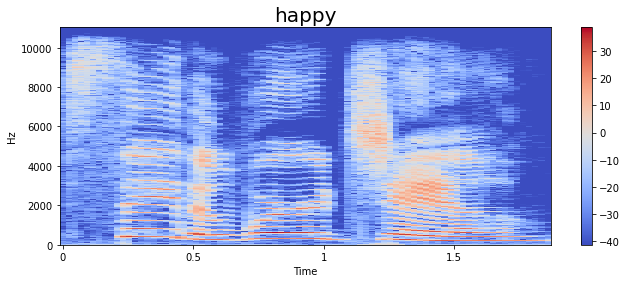

In [17]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [18]:
##Feature Extraction

In [19]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [20]:
extract_mfcc(df['speech'][0])

array([-287.13037  ,   87.756935 ,   -4.139178 ,   24.081968 ,
        -16.696726 ,   12.9706335,   10.522443 ,   -1.1463207,
         -0.7333776,   12.855535 ,  -19.147291 ,   -6.418062 ,
          4.9657674,   -2.6571147,  -10.655446 ,    4.9578824,
        -14.555861 ,   15.37587  ,   18.444933 ,   23.878317 ,
         31.495148 ,   17.326372 ,   -4.764838 ,    1.7432449,
        -12.009848 ,    7.34574  ,   -3.205127 ,   -7.1714525,
        -11.410635 ,   -2.0019934,   -5.6109643,    4.532194 ,
        -11.396626 ,   -8.892363 ,   -3.7391381,    4.8819685,
         -1.5599906,    2.4654472,   11.599151 ,   11.042193 ],
      dtype=float32)

In [21]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [22]:
X_mfcc

0     [-287.13037, 87.756935, -4.139178, 24.081968, ...
1     [-418.1624, 95.93736, -3.7743986, -18.47477, 1...
2     [-456.5042, 86.417496, -2.227859, -20.33538, -...
3     [-419.40732, 104.45123, 17.65691, -1.7123181, ...
4     [-527.6754, 75.08589, 27.552502, 5.176199, 5.0...
5     [-332.0682, 45.32851, -25.895004, 12.570195, -...
6     [-547.668, 105.78639, 26.357706, 15.183707, 23...
7     [-426.18835, 119.13692, -11.9823675, 1.9257216...
8     [-410.64047, 88.71188, -11.23679, 18.071363, -...
9     [-502.49493, 115.23837, 3.128171, -4.255478, 5...
10    [-304.11893, 58.818604, -25.267494, 21.955006,...
11    [-423.54663, 106.119644, 16.355644, -18.711555...
12    [-456.28793, 90.69279, 18.380562, 40.335842, 3...
13    [-379.04425, 83.88796, -28.002804, -15.297637,...
14    [-287.13037, 87.756935, -4.139178, 24.081968, ...
15    [-418.1624, 95.93736, -3.7743986, -18.47477, 1...
16    [-456.5042, 86.417496, -2.227859, -20.33538, -...
17    [-419.40732, 104.45123, 17.65691, -1.71231

In [23]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(28, 40)

In [24]:
## input split
X = np.expand_dims(X,-1)
X.shape

(28, 40, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [26]:
y.toarray()

array([[0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
 

In [27]:
y.shape

(28, 7)

## Create a LSTM model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
    
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2022-09-19 13:42:07.771525: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 123)               61500     
_________________________________________________________________
dense (Dense)                (None, 64)                7936      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 71,747
Trainable params: 71,747
Non-trainable params: 0
____________________________________________________

In [29]:
# Train the model
history = model.fit(X, y.toarray(), validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

2022-09-19 13:42:08.527286: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.9525 - accuracy: 0.0455 - val_loss: 1.9797 - val_accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 69ms/step - loss: 1.9181 - accuracy: 0.1818 - val_loss: 1.9584 - val_accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 67ms/step - loss: 1.9032 - accuracy: 0.2273 - val_loss: 1.9431 - val_accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 69ms/step - loss: 1.8630 - accuracy: 0.2273 - val_loss: 1.9291 - val_accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 70ms/step - loss: 1.8352 - accuracy: 0.2727 - val_loss: 1.9137 - val_accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 77ms/step - loss: 1.8744 - accuracy: 0.2273 - val_loss: 1.8991 - val_accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 67ms/step - loss: 1.8106 - accuracy: 0.4091 - val_loss: 1.8880 - val_accuracy: 0.3333
Epoch 8/100
1/1 [=====

In [30]:
## Plot the Results

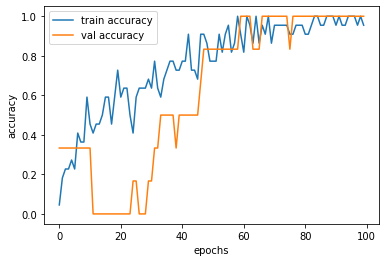

In [31]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

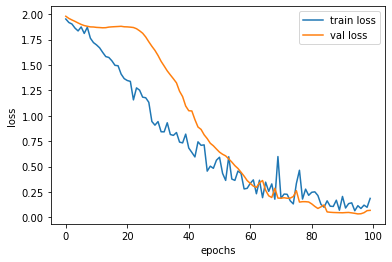

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()